# importing the essentials

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('vgsales.csv')

# Understanding the Data

In [3]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [4]:
df.shape

(16598, 11)

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.info())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


there are few null values which can be droped and no duplicates

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


No such distinct outlier in the dataset

In [8]:
for col in df.columns[:5]:
    print(f'{col} : {df[col].unique()}')
    print('-'*50)

Rank : [    1     2     3 ... 16598 16599 16600]
--------------------------------------------------
Name : ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ... 'Plushees'
 'Woody Woodpecker in Crazy Castle 5' 'Know How 2']
--------------------------------------------------
Platform : ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
--------------------------------------------------
Year : [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]
--------------------------------------------------
Genre : ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
-----------------------------------

No such out of the place data inside the rows

# Data Cleaning

dropping all the data as there are plenty 

In [9]:
df.dropna(inplace=True)

# EDA

### Univariant eda

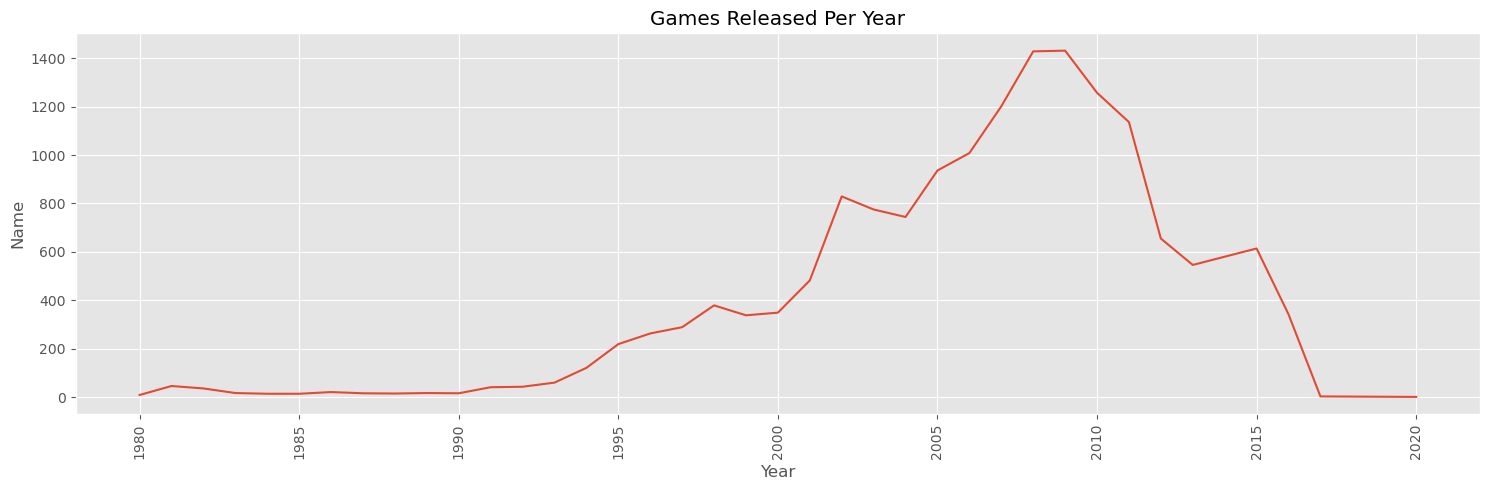

In [10]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Year", y="Name", data=df.groupby('Year')['Name'].count().reset_index()).set_title('Games Released Per Year')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### Top 10 Publisher with most amount of release

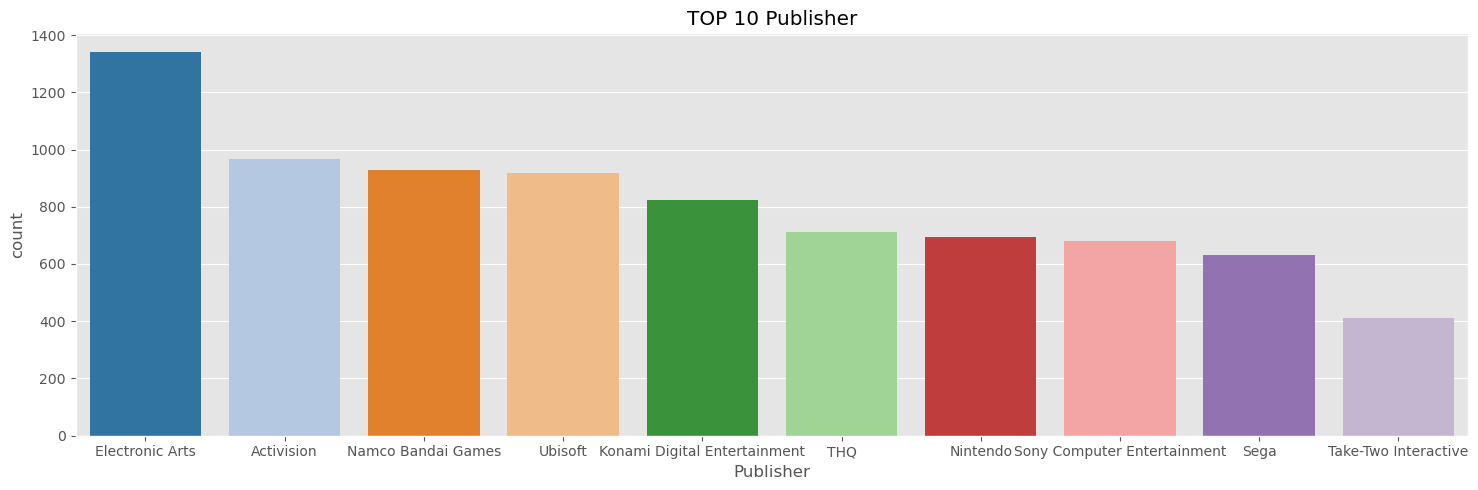

In [11]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Publisher', data = df, palette='tab20', order=df['Publisher'].value_counts().iloc[:10].index).set_title(f'TOP 10 Publisher')
plt.tight_layout()
plt.show()

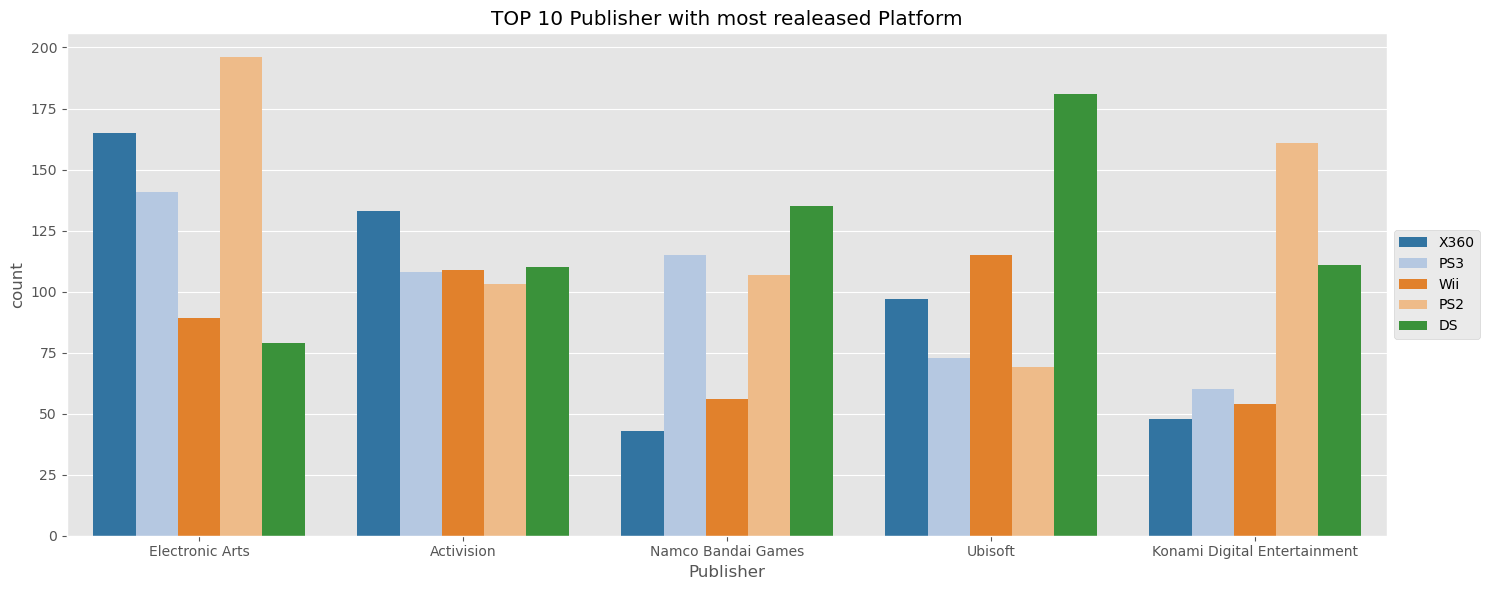

In [12]:
plt.figure(figsize=(15, 6))
sns.countplot(x = 'Publisher', data = df[df['Publisher'].isin(df['Publisher'].value_counts().iloc[:5].index) & df['Platform'].isin(df['Platform'].value_counts().iloc[:5].index)], palette='tab20',hue ='Platform' , order=df['Publisher'].value_counts().iloc[:5].index).set_title(f'TOP 10 Publisher with most realeased Platform')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

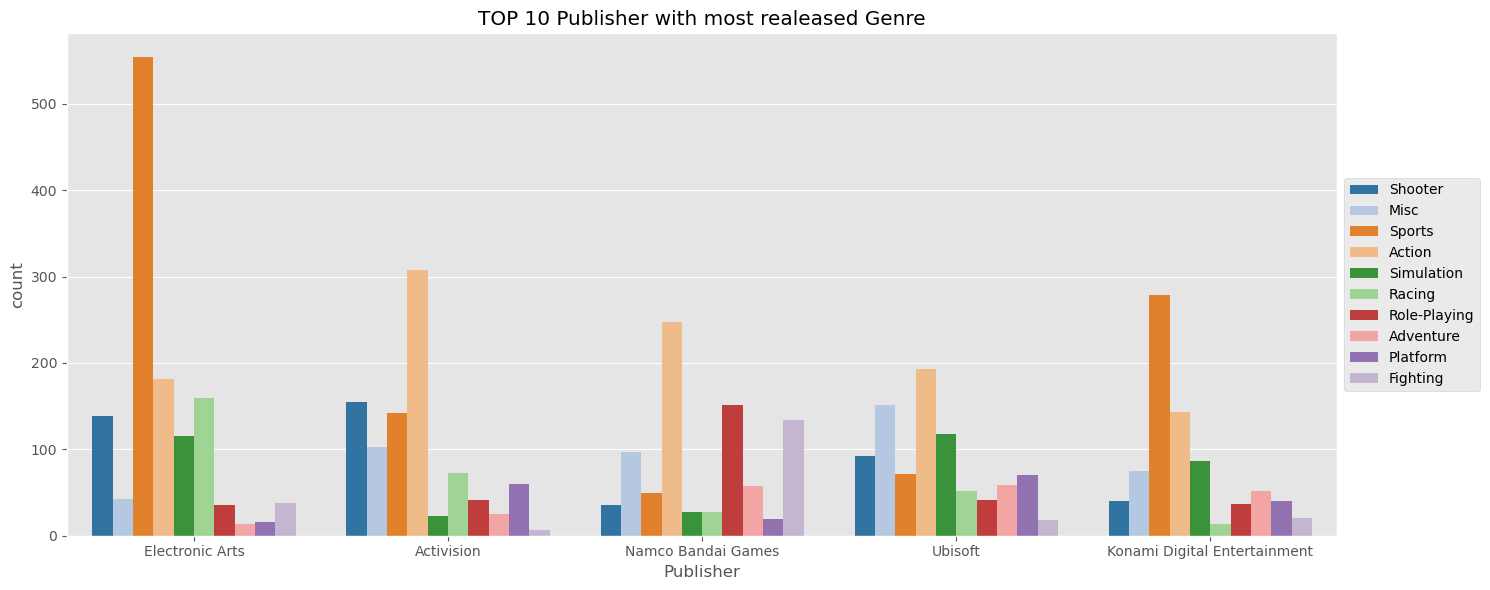

In [13]:
plt.figure(figsize=(15, 6))
sns.countplot(x = 'Publisher', data = df[df['Publisher'].isin(df['Publisher'].value_counts().iloc[:5].index) & df['Genre'].isin(df['Genre'].value_counts().iloc[:10].index)], palette='tab20',hue ='Genre' , order=df['Publisher'].value_counts().iloc[:5].index).set_title(f'TOP 10 Publisher with most realeased Genre')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

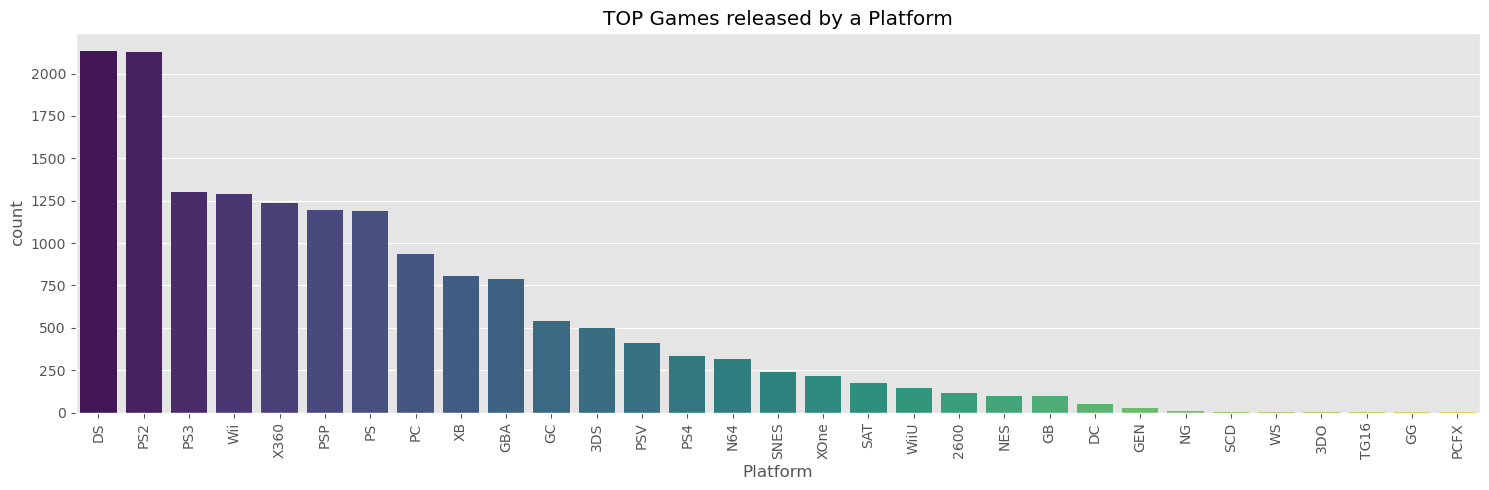

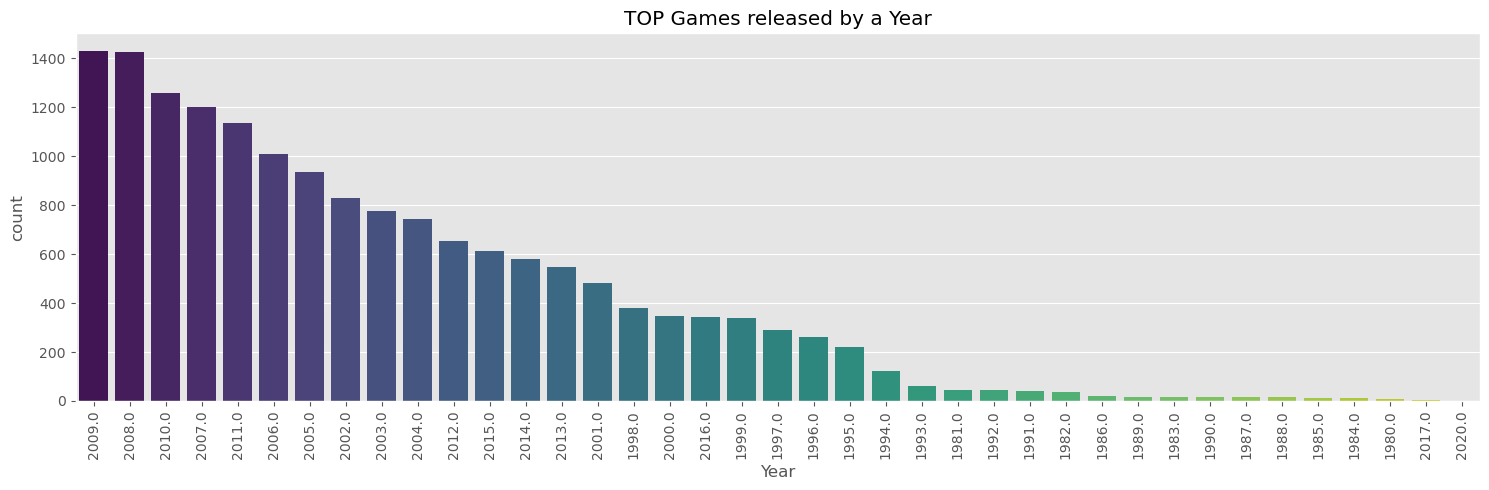

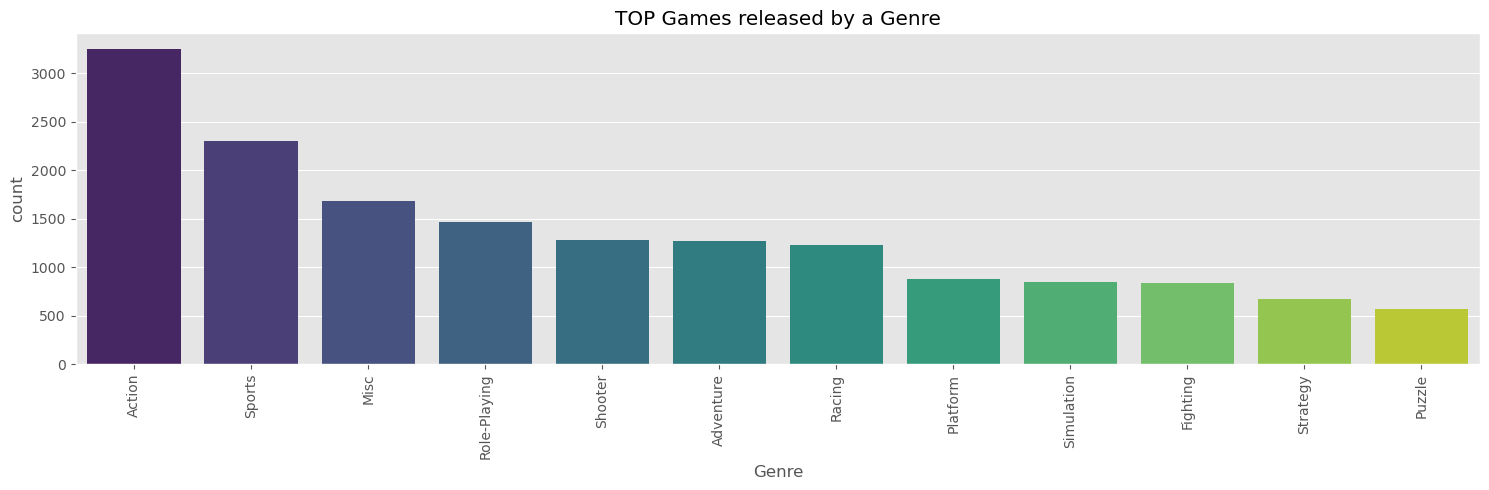

In [14]:
uni = [
    'Platform', 'Year', 'Genre'
]

for i in uni:
    plt.figure(figsize=(15, 5))
    sns.countplot(x = i, data = df, palette='viridis', order=df[i].value_counts().index).set_title(f'TOP Games released by a {i}')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

- Looks like most games where realeased in DS, PS2
- Most realeased year is 2008 and 2009
- Action genre has the most amount of games

### TOP 5 year's - TOP 5 Genres

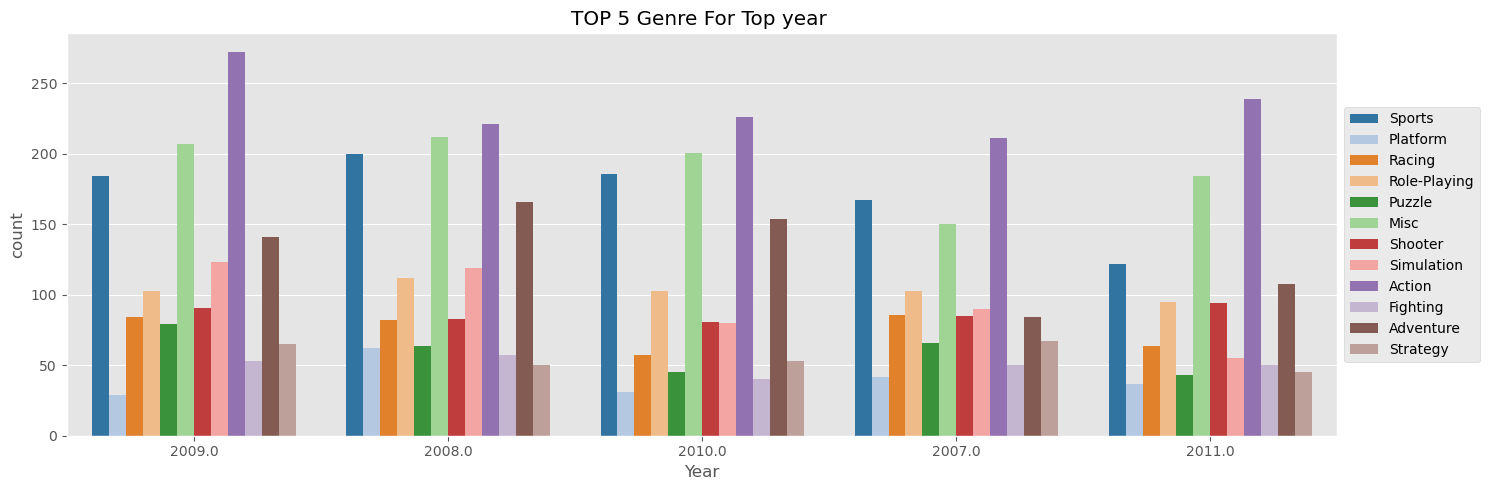

In [15]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Year', data = df, palette='tab20',hue="Genre",  order=df['Year'].value_counts().iloc[:5].index).set_title(f'TOP 5 Genre For Top year ')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

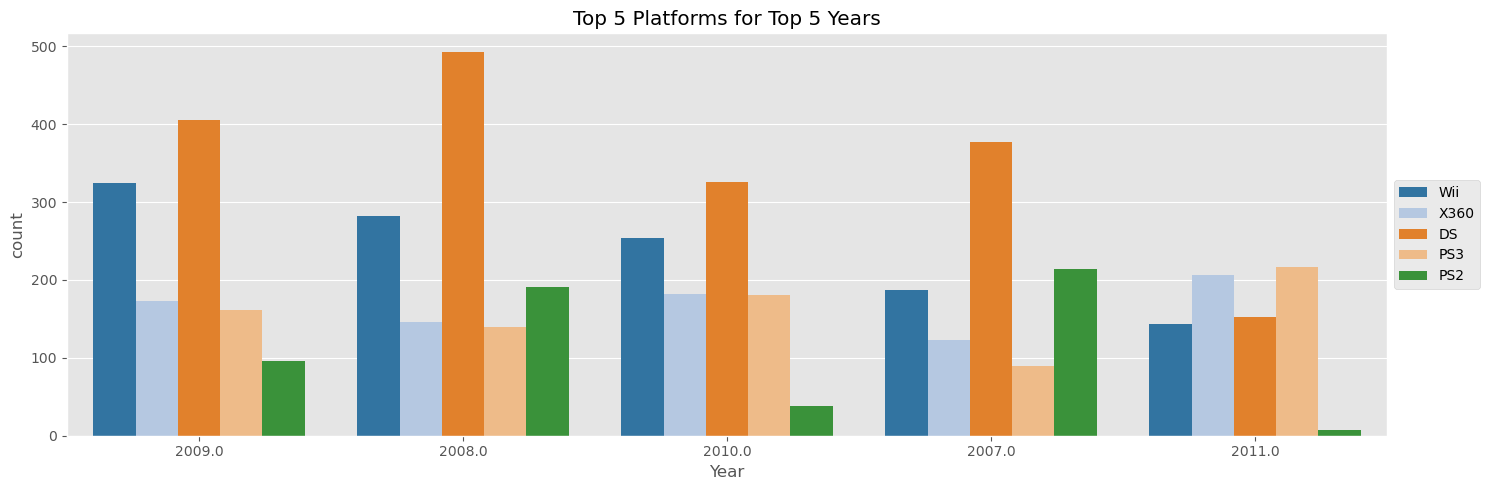

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(
    x='Year',
    data=df[df['Year'].isin(df['Year'].value_counts().iloc[:5].index) & df['Platform'].isin(df['Platform'].value_counts().iloc[:5].index)],
    hue='Platform',
    palette='tab20',
    order=df['Year'].value_counts().iloc[:5].index
).set_title('Top 5 Platforms for Top 5 Years')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

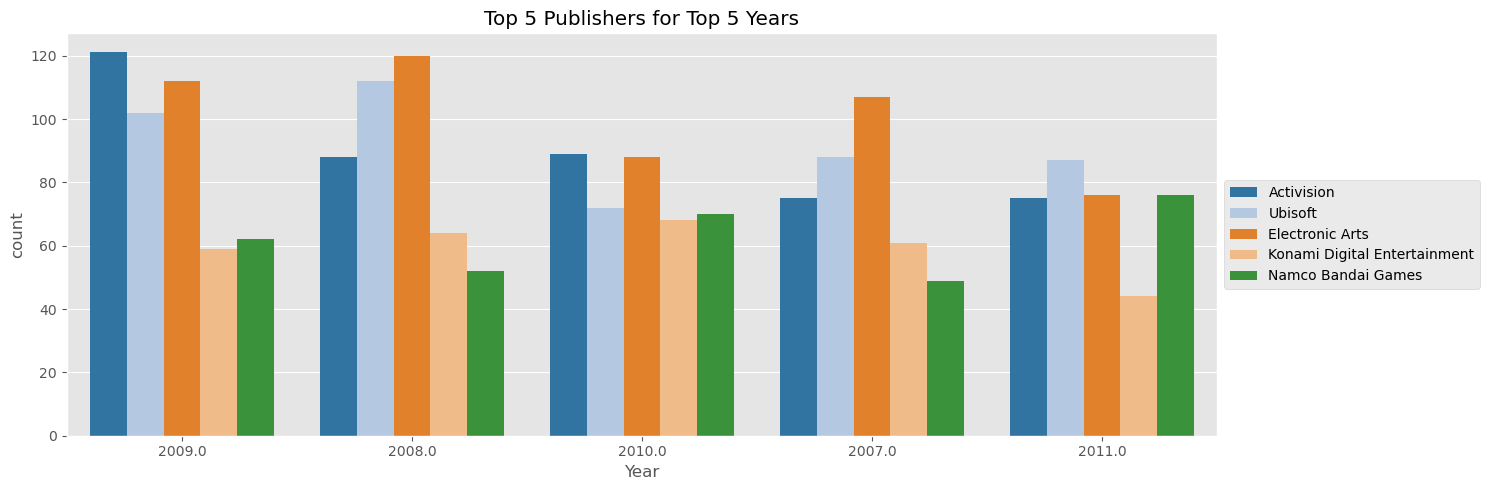

In [17]:
plt.figure(figsize=(15, 5))
sns.countplot(
    x='Year',
    data=df[df['Year'].isin(df['Year'].value_counts().iloc[:5].index) & df['Publisher'].isin(df['Publisher'].value_counts().iloc[:5].index)],
    hue='Publisher',
    palette='tab20',
    order=df['Year'].value_counts().iloc[:5].index
).set_title('Top 5 Publishers for Top 5 Years')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

### TOP Genre used by the Top 3 Platform

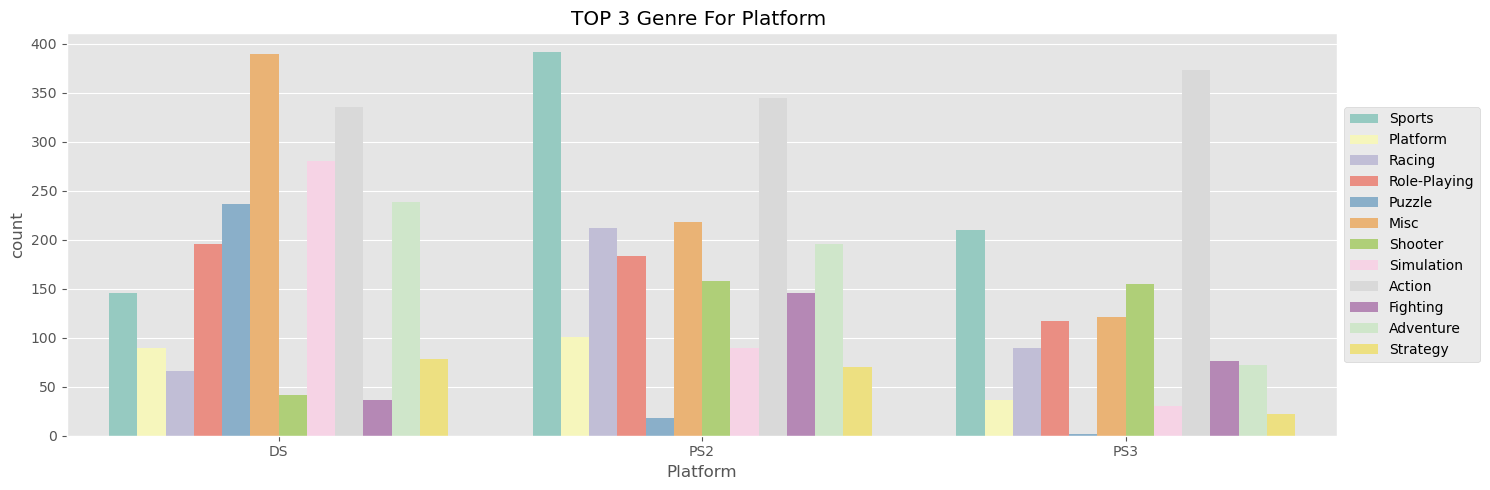

In [18]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Platform', data = df, palette='Set3',hue="Genre",  order=df['Platform'].value_counts().iloc[:3].index).set_title(f'TOP 3 Genre For Platform ')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

### Bivariant

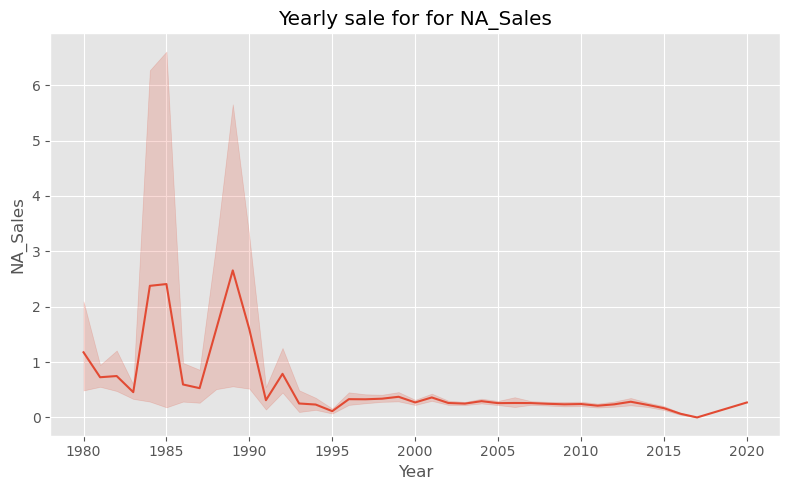

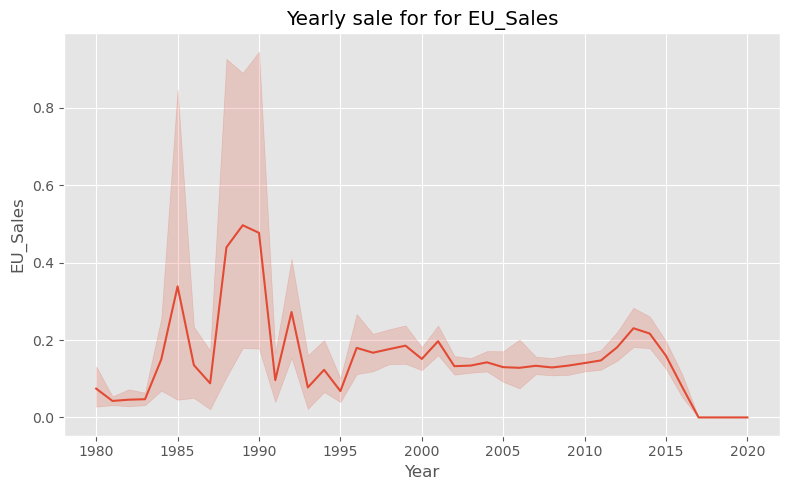

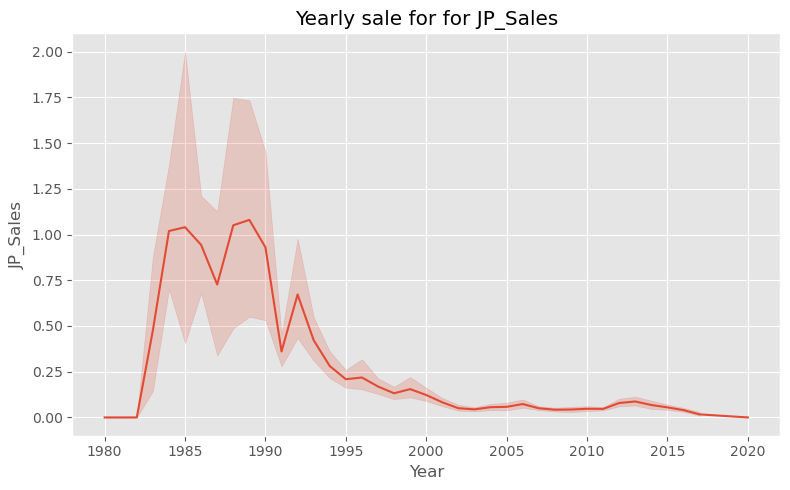

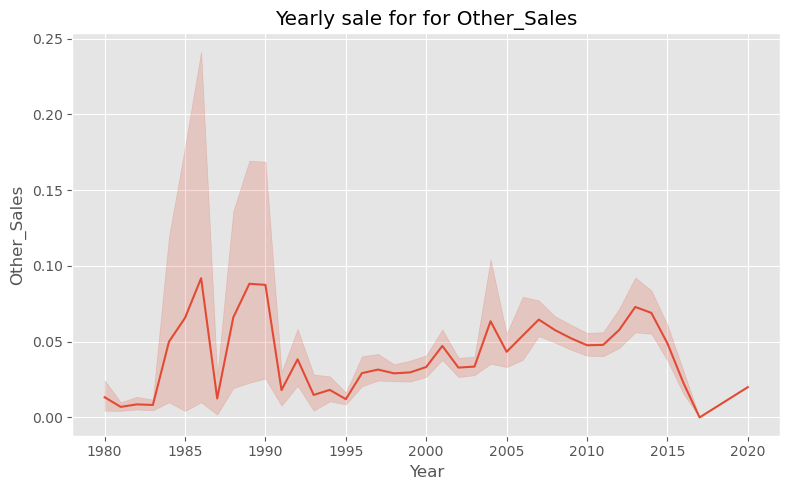

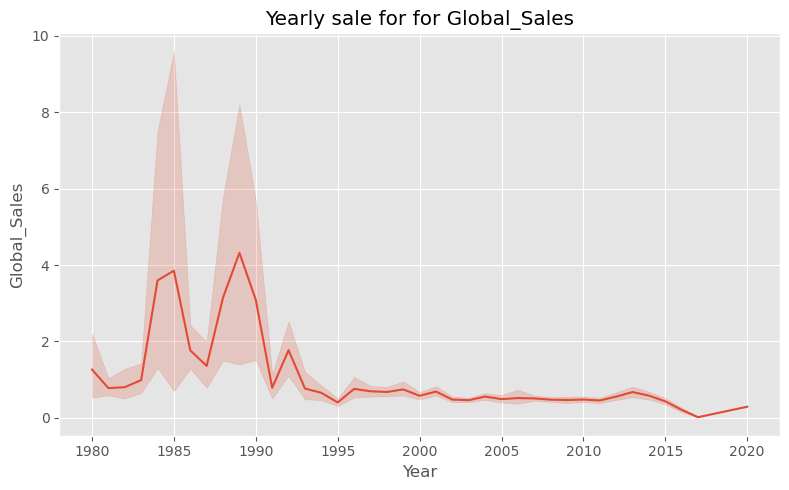

In [19]:
bi_line= [
    'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'
]
for i in bi_line:
    plt.figure(figsize=(8,5))
    sns.lineplot(y = i, x= 'Year', data = df).set_title(f'Yearly sale for for {i}')
    plt.tight_layout()
    plt.show()

Every sales has peaked in 1985 and 1990 and has gradually declined throughout the year

### Top 10 Games and Platform Sales For EU,NA,JP,OTher and Global

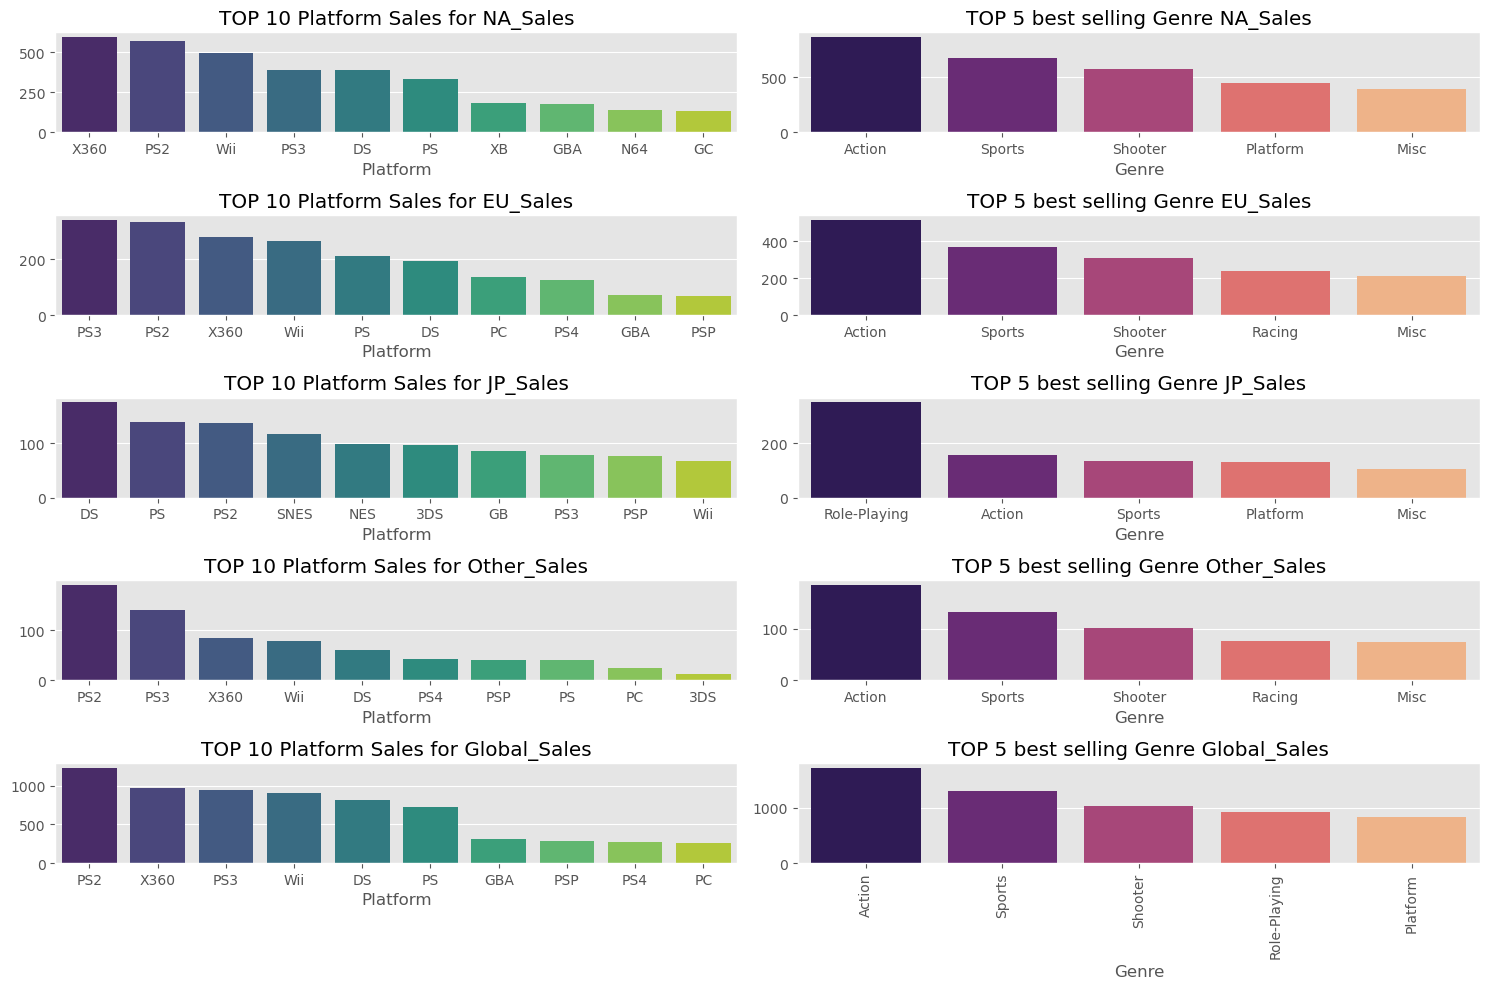

In [20]:
bi_bar = [
    'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'
]
fig = plt.figure(figsize=(15, 10))
for i, item in enumerate(bi_bar):
    #Left sife Platform
    ax = plt.subplot(5,2, i*2+1)
    sns.barplot(x =df.groupby('Platform')[item].sum().nlargest(10).index, y =df.groupby('Platform')[item].sum().nlargest(10).values, palette='viridis').set_title(f'TOP 10 Platform Sales for {item}')

    #Right side Genre
    ax = plt.subplot(5,2, i*2+2)
    sns.barplot(  x=df.groupby('Genre')[item].sum().nlargest(5).index, y=df.groupby('Genre')[item].sum().nlargest(5).values,palette='magma').set_title(f'TOP 5 best selling Genre {item}')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

 - PS Seems to be dominating the Sales in many countries except japan and NA
 - Action Genre has the most sales except in japan 

### Top Games sale Globally 

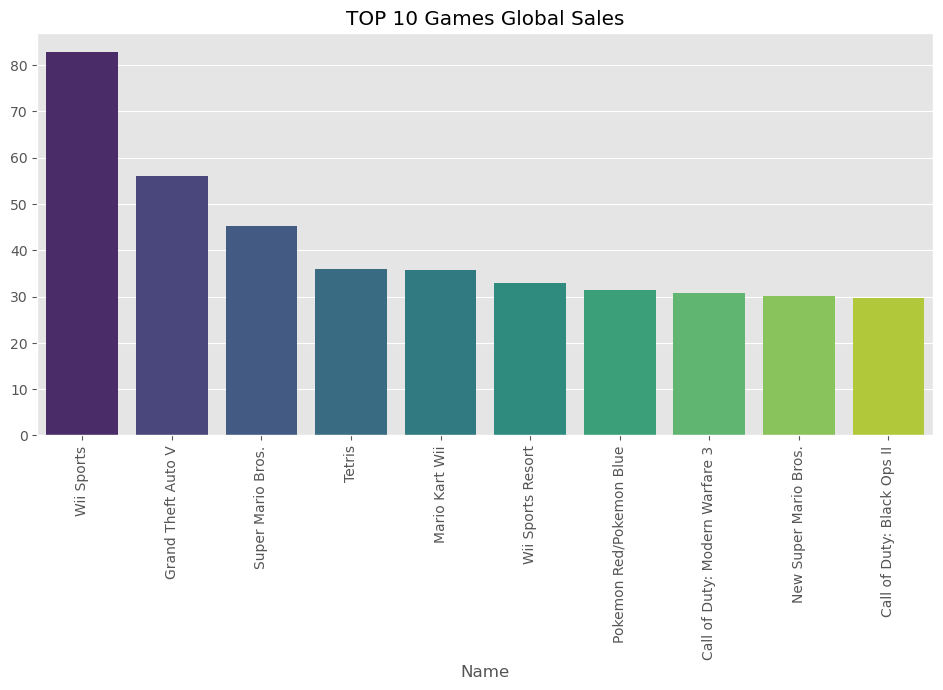

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(  x=df.groupby('Name')['Global_Sales'].sum().nlargest(10).index, y=df.groupby('Name')['Global_Sales'].sum().nlargest(10).values,palette='viridis',).set_title(f'TOP 10 Games Global Sales')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

### Publisher with the most amount of Global sales

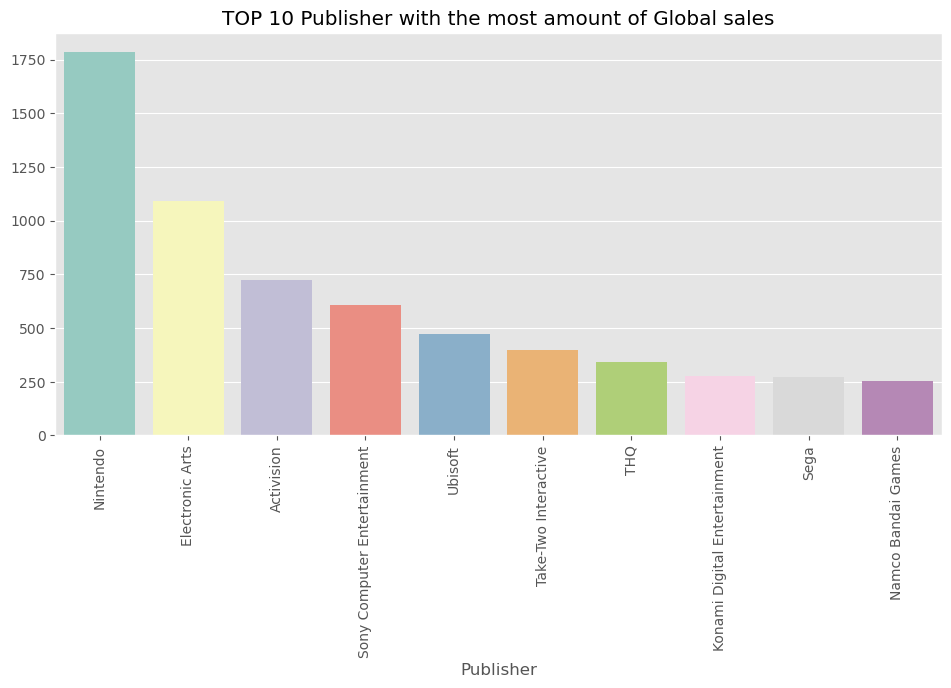

In [22]:
plt.figure(figsize=(10,5))
sns.barplot( x=df.groupby('Publisher')['Global_Sales'].sum().nlargest(10).index, y=df.groupby('Publisher')['Global_Sales'].sum().nlargest(10).values,palette='Set3',).set_title(f'TOP 10 Publisher with the most amount of Global sales')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

<Axes: >

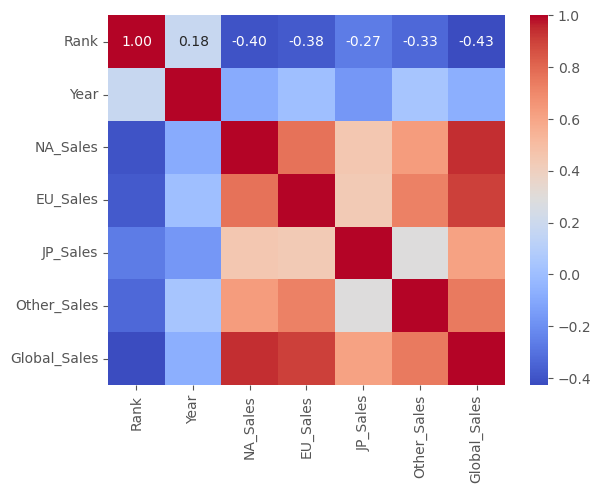

In [23]:
heat = df.corr(numeric_only=True)
sns.heatmap(heat,fmt=".2f", cmap="coolwarm", annot=True)

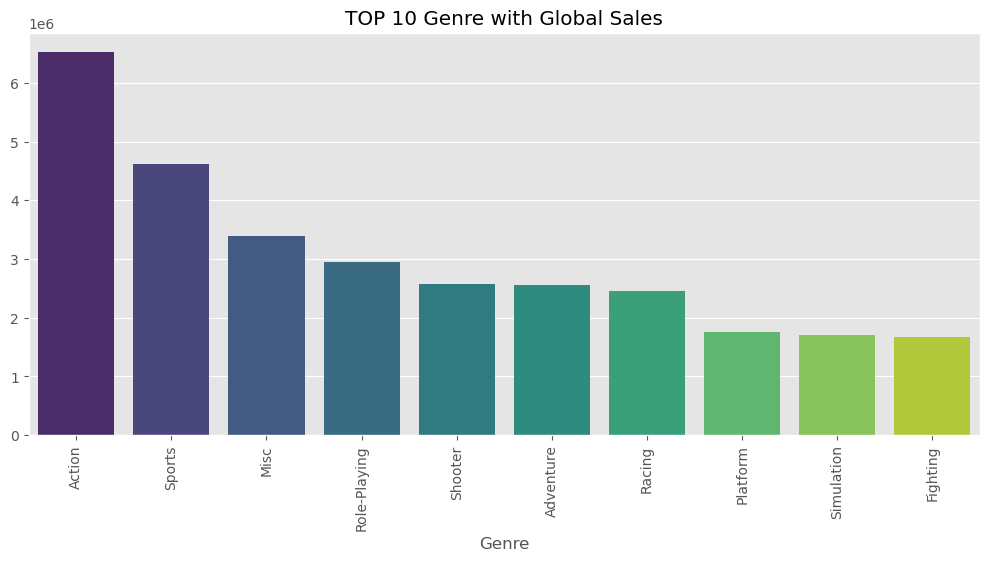

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(  x=df.groupby('Genre')['Year'].sum().nlargest(10).index, y=df.groupby('Genre')['Year'].sum().nlargest(10).values,palette='viridis',).set_title(f'TOP 10 Genre with Global Sales')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

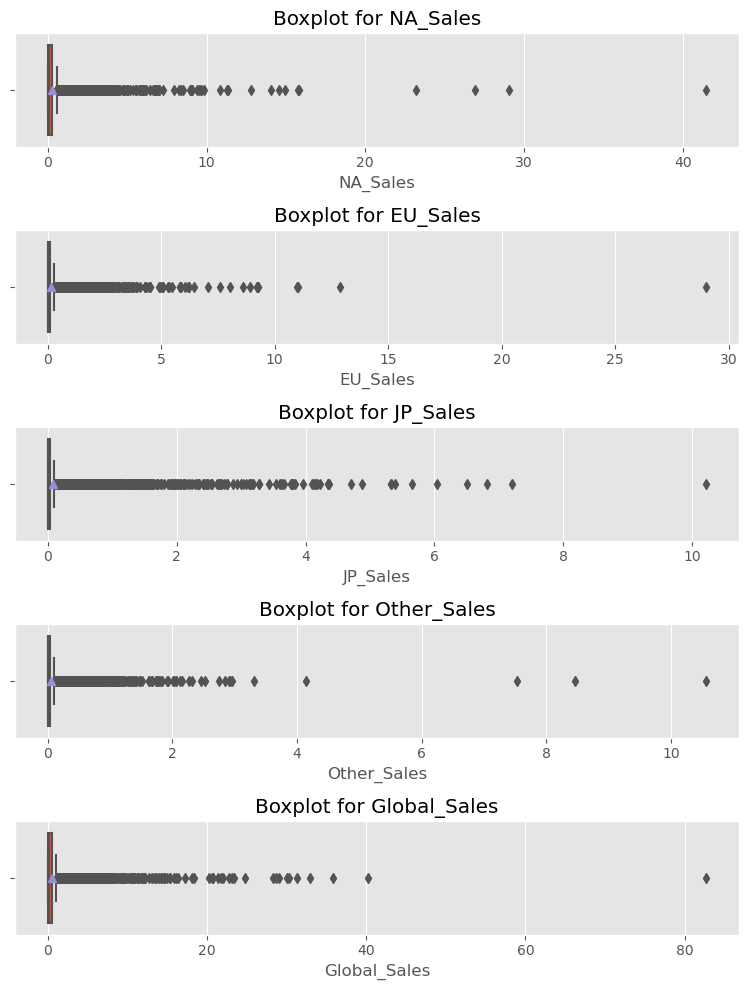

In [25]:
uni_box= [
    'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'
]
fig = plt.figure(figsize=(15,10))
for i, item in enumerate(uni_box):
    axes= plt.subplot(5, 2, 2*i+1)
    sns.boxplot(x = item, data = df,ax=axes, showmeans = True).set_title(f'Boxplot for {item}')

plt.tight_layout()
plt.show()

There are a lot of outliers in the data here in all the sales.

## Dealing the outlier for the sales

### Identifing the Outliers

In [26]:
df[df['NA_Sales'] > 20]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [27]:
df[df['EU_Sales'] > 10]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76


In [28]:
df[df['JP_Sales'] > 6]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36


In [29]:
df[df['Other_Sales'] > 4]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
47,48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66


In [30]:
df[df['Global_Sales'] > 40]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


## Removing the Outliers

In [31]:
# For extra safty and potential error
# backup_DF = df
# backup_DF = backup_DF[
#     (backup_DF['NA_Sales'] < 20) &
#     (backup_DF['EU_Sales'] < 10) &
#     (backup_DF['JP_Sales'] < 6) &
#     (backup_DF['Other_Sales'] < 4) &
#     (backup_DF['Global_Sales'] < 40)
# ].reset_index(drop=True)

df = df[
    (df['NA_Sales'] < 20) &
    (df['EU_Sales'] < 10) &
    (df['JP_Sales'] < 6) &
    (df['Other_Sales'] < 4) &
    (df['Global_Sales'] < 40)
].reset_index(drop=True)